ResNet 응용

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50,decode_predictions

In [4]:
resnet50=ResNet50()
resnet50.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
up=files.upload()

Saving 다운로드 (1).jfif to 다운로드 (1).jfif


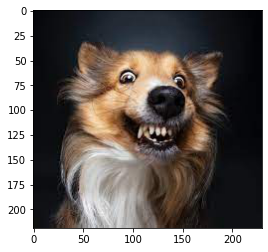

In [9]:
img=Image.open('다운로드 (1).jfif')
plt.imshow(img);

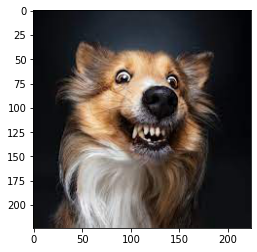

In [10]:
#ResNet50은 224x224x3 기준으로 이미지를 처리함
img=img.resize((224,224))
plt.imshow(img);

- 이미지 예측

In [14]:
# predict() 를 사용하려면 차원을 늘려주어야 함.
img_array=np.array(img)
img_array.shape


(224, 224, 3)

In [16]:
yhat=resnet50.predict(img_array.reshape(1,224,224,3))
label=decode_predictions(yhat)
yhat.shape,label

49152/35363 [=========================================] - 0s 0us/step


((1, 1000),
 [[('n02086910', 'papillon', 0.40653983),
   ('n02112018', 'Pomeranian', 0.32754394),
   ('n02106166', 'Border_collie', 0.072105445),
   ('n02112350', 'keeshond', 0.070410885),
   ('n02105855', 'Shetland_sheepdog', 0.052368455)]])

In [18]:
img_class=label[0][0][1]
prob=label[0][0][2]

In [19]:
img_class,prob

('papillon', 0.40653983)